In [1]:
from classes import *
import constants as c
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
SAMPLE_METADATA = c.SAMPLE_DATA_DIR + '/metadata.json'

In [3]:
metadata = Metadata(SAMPLE_METADATA, sample=True)
original_df = metadata.original()
fake_df = metadata.fake()

In [4]:
original_df.head()

,id
2,abarnvbtwb
13,aelfnikyqj
17,afoovlsmtx
20,agrmhtjdlk
24,ahqqqilsxt


In [5]:
fake_df.head()

,id,original
0,aagfhgtpmv,vudstovrck
1,aapnvogymq,jdubbvfswz
3,abofeumbvv,atvmxvwyns
4,abqwwspghj,qzimuostzz
5,acifjvzvpm,kbvibjhfzo


In [6]:
pairs_df = metadata.get_sample_pairs().drop_duplicates(subset=['id_original'])
pairs_df.head(10)

,id_original,id_fake
0,abarnvbtwb,eepezmygaq
1,afoovlsmtx,etmcruaihe
2,atkdltyyen,cksanfsjhc
3,atvmxvwyns,abofeumbvv
9,avmjormvsx,ehfiekigla
10,aytzyidmgs,agqphdxmwt
11,bdnaqemxmr,etohcvnzbj
12,bejhvclboh,ehdkmxgtxh
13,bffwsjxghk,dfbpceeaox
14,bgwmmujlmc,dzvyfiarrq


In [7]:
original_video = Video(metadata, 'afoovlsmtx', frameLimit=150)
fake_video = Video(metadata, 'etmcruaihe', frameLimit=150)

Loading frames for video afoovlsmtx...


  0%|          | 0/150 [00:00<?, ?it/s]

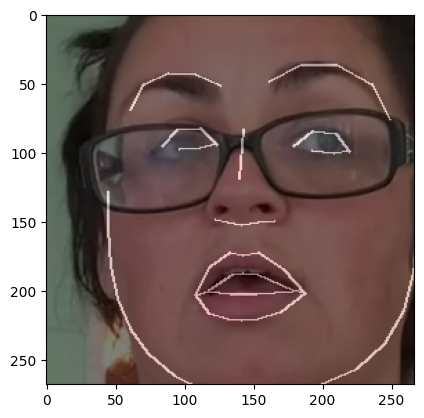

In [ ]:
original_video.drawFaceLandmarks(1)

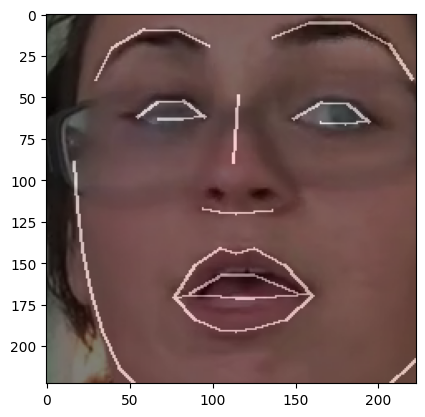

In [ ]:
fake_video.drawFaceLandmarks(1)

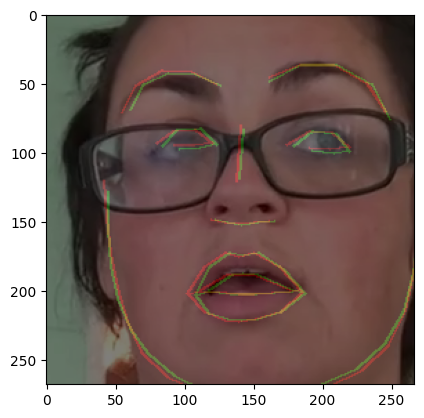

In [ ]:
original_video.drawFaceLandmarkComparison(1, fake_video)

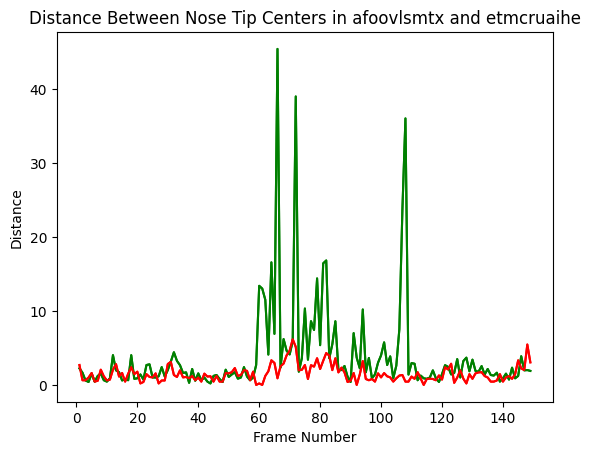

In [ ]:
original_video.graphFeatureDistanceComparison("nose_tip", fake_video)

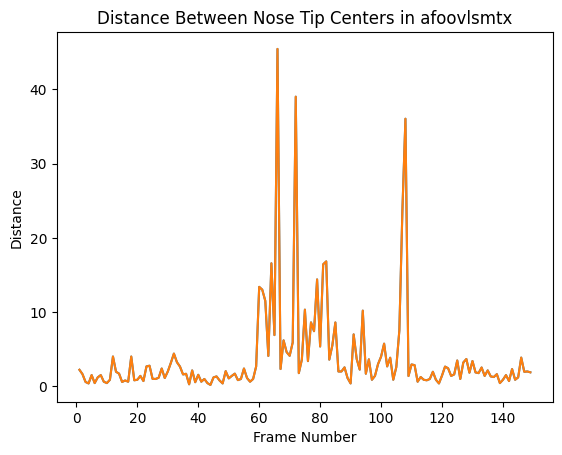

In [ ]:
original_video.graphFeatureDistance("nose_tip")

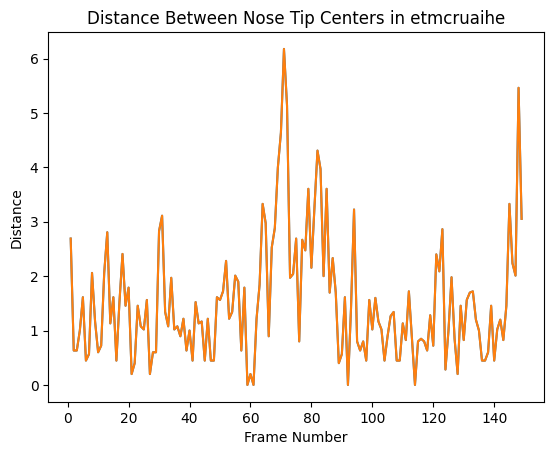

In [ ]:
fake_video.graphFeatureDistance("nose_tip")

In [ ]:
original_video.getFeatureDf("nose_tip")

,0,1,2,3,4,central_position,distance,velocity_x,velocity_y
0,"(411, 851)","(420, 854)","(430, 856)","(443, 854)","(456, 853)","[432.0, 853.6]",NaN,NaN,NaN
1,"(412, 854)","(421, 856)","(431, 858)","(443, 856)","(455, 855)","[432.4, 855.8]",2.236068,NaN,NaN
2,"(410, 853)","(420, 856)","(430, 857)","(441, 856)","(453, 855)","[430.8, 855.4]",1.649242,2.0,2.6
3,"(410, 853)","(419, 856)","(429, 857)","(441, 856)","(452, 855)","[430.2, 855.4]",0.600000,-1.0,-0.4
4,"(409, 854)","(419, 857)","(429, 857)","(441, 856)","(453, 855)","[430.2, 855.8]",0.400000,-0.6,-0.4
...,...,...,...,...,...,...,...,...,...
145,"(424, 875)","(434, 878)","(445, 880)","(457, 876)","(468, 872)","[445.6, 876.2]",1.216553,0.6,-0.4
146,"(422, 879)","(433, 882)","(445, 883)","(456, 880)","(468, 876)","[444.8, 880.0]",3.883298,0.6,-2.6
147,"(421, 881)","(432, 883)","(444, 885)","(456, 882)","(467, 878)","[444.0, 881.8]",1.969772,0.0,2.0
148,"(422, 883)","(433, 885)","(444, 886)","(454, 884)","(466, 881)","[443.8, 883.8]",2.009975,-0.6,-0.2


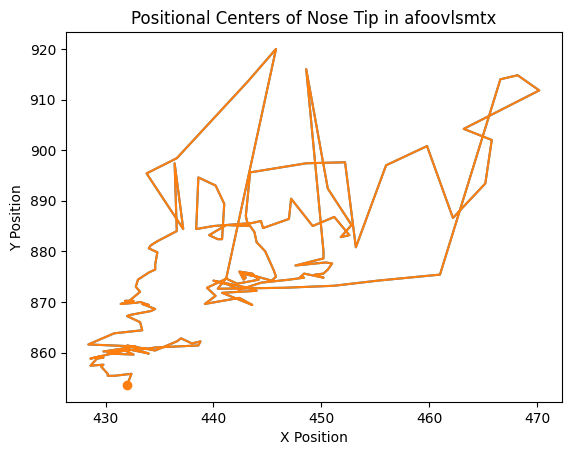

In [ ]:
original_video.drawFeatureCentralPositions("nose_tip")

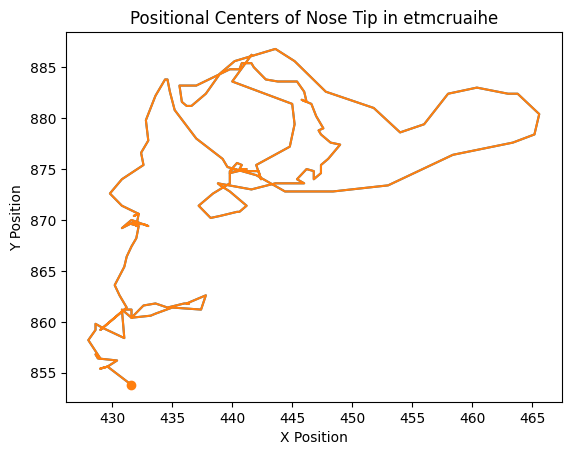

In [ ]:
fake_video.drawFeatureCentralPositions("nose_tip")

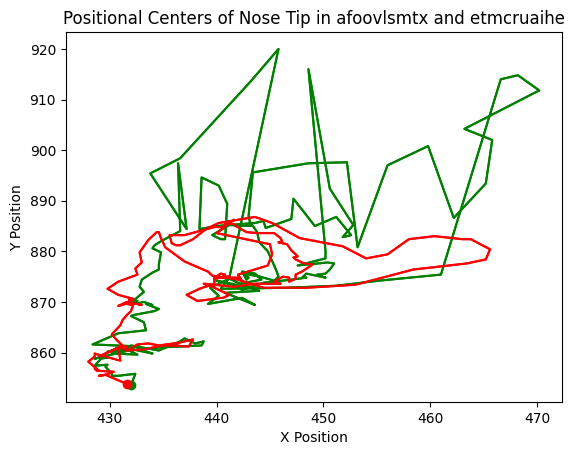

In [ ]:
original_video.drawFeatureCentralPositionsComparison("nose_tip", fake_video)

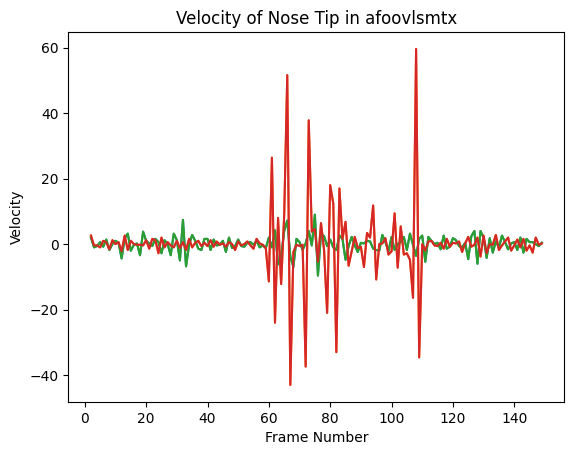

In [ ]:
original_video.graphFeatureVelocity("nose_tip")

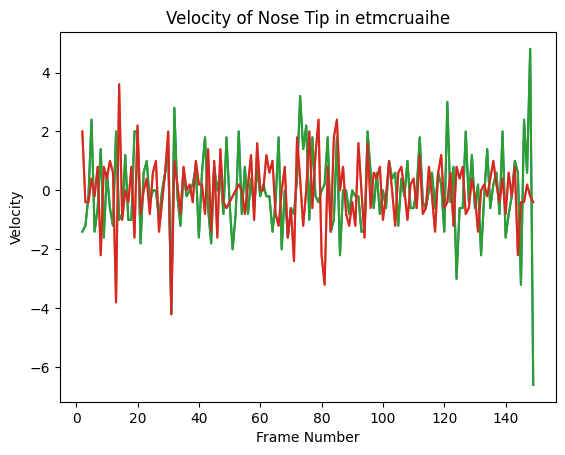

In [ ]:
fake_video.graphFeatureVelocity("nose_tip")

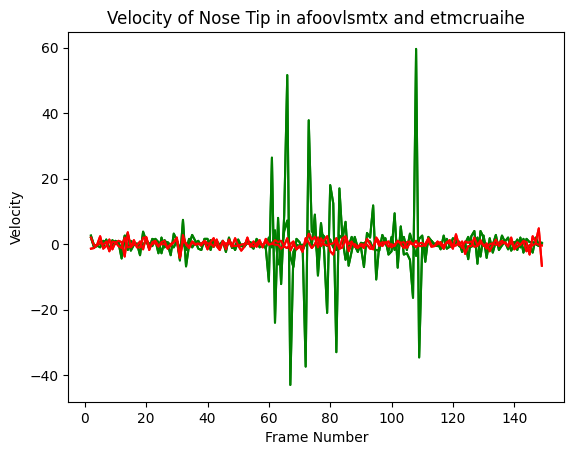

In [ ]:
original_video.graphFeatureVelocityComparison("nose_tip", fake_video)

In [ ]:
original_video_2 = Video(metadata, 'bdnaqemxmr', frameLimit=150)
fake_video_2 = Video(metadata, 'etohcvnzbj', frameLimit=150)

Loading frames for video bdnaqemxmr...


  0%|          | 0/150 [00:00<?, ?it/s]

Loading frames for video etohcvnzbj...


  0%|          | 0/150 [00:00<?, ?it/s]

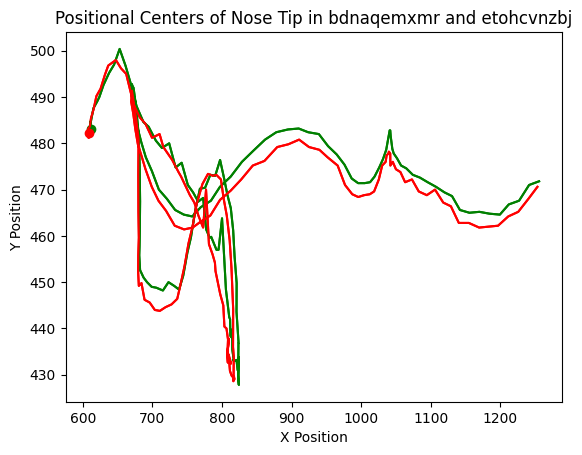

In [ ]:
original_video_2.drawFeatureCentralPositionsComparison("nose_tip", fake_video_2)

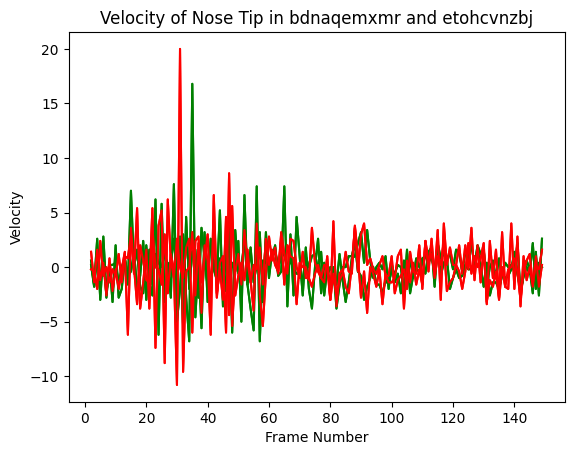

In [ ]:
original_video_2.graphFeatureVelocityXComparison("nose_tip", fake_video_2)

In [ ]:
original_video_2.graphFeatureVelocityYComparison("nose_tip", fake_video_2)

In [ ]:
original_video_2.getVelocityVariance("nose_tip")

AttributeError: 'Video' object has no attribute 'getVelocityVariance'

In [ ]:
fake_video_2.getVelocityVariance("nose_tip")

In [ ]:
df1 = pairs_df.head(5)[['id_original']]
df2 = pairs_df.head(5)[['id_fake']]
features_df = pd.DataFrame(columns=['id', 'feature', 'variance', 'label'])

for index, row in df1.iterrows():
    video = Video(metadata, row['id'], frameLimit=150)
    variance = video.getVelocityVariance("nose_tip")
    label = 'original'
    features_df = features_df.append({'id': row['id'], 'feature': 'nose_tip', 'variance': variance, 'label': label}, ignore_index=True)

for index, row in df2.iterrows():
    video = Video(metadata, row['id'], frameLimit=150)
    variance = video.getVelocityVariance("nose_tip")
    label = 'fake'
    features_df = features_df.append({'id': row['id'], 'feature': 'nose_tip', 'variance': variance, 'label': label}, ignore_index=True)


In [ ]:
features_df.head(10)